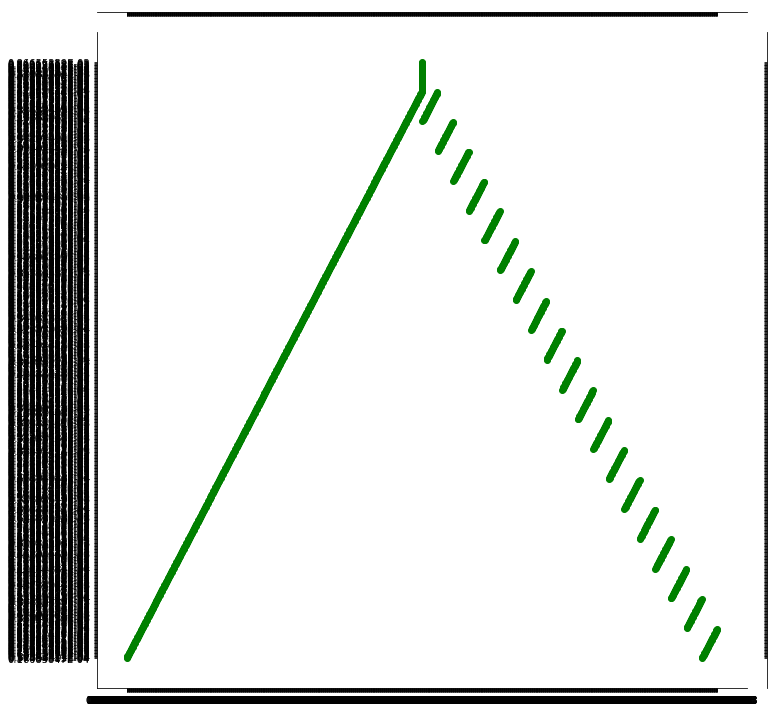

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

f = open('../data/f_xv.dat', 'r')
X = []
Y = []
for line in f:
    values = line.split()
    X.append(values[1])
    Y.append(values[2])
    
grid = sns.JointGrid(X, Y, space=10, height=10,ratio=30)
grid.plot_joint(plt.scatter, color="g")

/home/cristinvivian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: The griddata function was deprecated in Matplotlib 2.2 and will be removed in 3.1. Use scipy.interpolate.griddata instead.


Text(0.5, 1.0, 'velocity field')

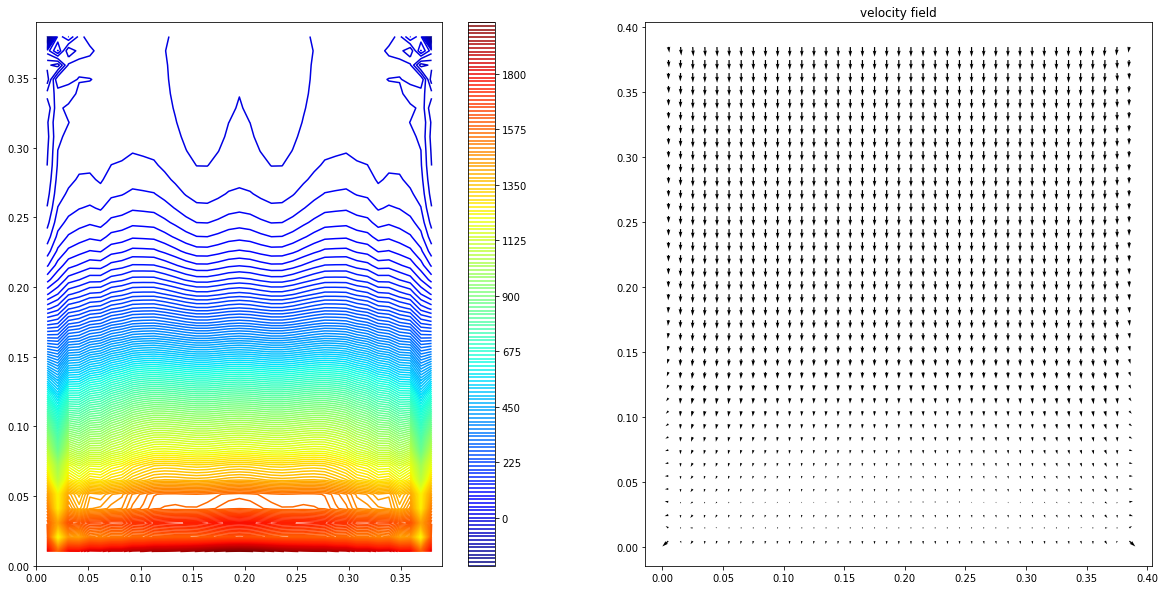

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.mlab import griddata
from numpy.random import uniform
from math import log10

npts=1521 #total number of fluid particles
steps=2000
xl = 0.39 #size of the domain, divided by 2
yl = 0.39
data1 = np.loadtxt('../data/f_xv.dat')
data0 = np.loadtxt('../data/ini_xv.dat')
data2 = np.loadtxt('../data/xv_vp.dat',skiprows=1)
data3 = np.loadtxt('../data/kernel.dat')
exdata = np.loadtxt('../data/f_state.dat')
data4 = np.loadtxt('../data/pcenter.dat')
data5 = np.loadtxt('../data/ini_virt.dat')
x0 = data0[:,1]
y0 = data0[:,2]
x2 = data1[:,1]
y2 = data1[:,2]
u2 = data1[:,3]
v2 = data1[:,4]
x3 = data2[:,1]
y3 = data2[:,2]
x5 = data5[:,1]
y5 = data5[:,2]
kernel1 = data3[:npts,1]
#kernel2 = data3[npts:,1]
fig, ax = plt.subplots(figsize=(20, 10))
#ax.set_title('wcsph results, fluid particle:%d,timestep:%d'%(npts,steps))
#init = plt.subplot(111,aspect=1.0)
#for i in range(len(x3)):
#    if x3[i]<=1.04:
#        init.plot(x3[i],y3[i],'.r')
#for i in range(len(x2)):
#    if x2[i]<=1.04:
#        init.plot(x2[i],y2[i],'.b')
#init.plot(x2,y2,'.b',x3,y3,'.r')
#init.set_title('particle distribution')

pressure = exdata[:,3]
density = exdata[:,2]
energy = exdata[:,4]
xi = np.linspace(0,xl,39)
yi = np.linspace(0,yl,39)
#m=np.log10(pressure)
# grid the data.
zi = griddata(x2,y2,pressure,xi,yi,interp='linear')
# contour the gridded data, plotting dots at the randomly spaced data points.
CS = plt.subplot(121)
#im2 = CS.scatter(x2,y2,10,pressure)
im2 = CS.contour(xi,yi,zi,200,cmap=plt.cm.jet)
#fmt = ticker.LogFormatterMathtext()
#fmt.create_dummy_axis()
#CS.clabel(im2, im2.levels[::2])
fig.colorbar(im2,ax=CS,pad=0.05)
#CS.set_title('pressure field') #both contour & scatter are used

#ccs = plt.subplot(224, aspect =1.0)

#im3 = ccs.scatter(x2,y2,10,kernel1)
#ccs.set_title('kernel scatter')
vel = plt.subplot(122)
vel.quiver(x2,y2,u2,v2)
vel.set_title('velocity field')

#den = plt.subplot(313,aspect=1.0)
#for i in range(len(x2)):
#    if density[i]<=1000:
#        den.scatter(x2[i],y2[i],density[i]/10)
#im3=den.scatter(x2,y2,10,density)
#fig.colorbar(ax=den,pad=0.05)

#den = plt.subplot(224)
#zii = griddata(x2,y2,pressure,xi,yi,interp='linear')
#im3 = den.contour(xi,yi,zii,200,cmap=plt.cm.jet)
#fig.colorbar(im3, ax =den,pad=0.05)
#den.set_title('density field')

/home/cristinvivian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The griddata function was deprecated in Matplotlib 2.2 and will be removed in 3.1. Use scipy.interpolate.griddata instead.
  This is separate from the ipykernel package so we can avoid doing imports until


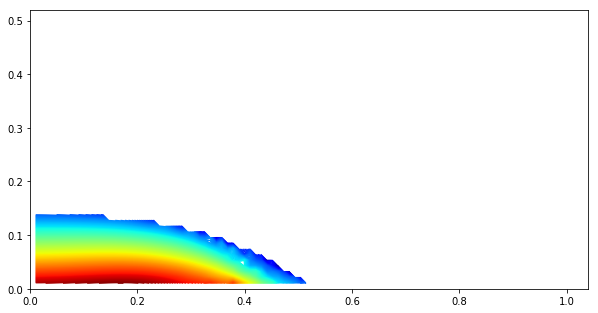

In [41]:
fig, ax = plt.subplots(figsize=(10, 10))
CS = plt.subplot(111,aspect=1.0)
zii = griddata(x2,y2,pressure,xi,yi,interp='linear')
image = plt.contour(xi,yi,zii,200,cmap=plt.cm.jet)
#image.figuresize(20,20)
#fig.colorbar(image,ax = CS,pad=0.05)
    
#print(pressure)

In [5]:
help np.loadtxt

SyntaxError: invalid syntax (<ipython-input-5-d0f46aae645a>, line 1)

In [15]:
print(255/1.76)

144.88636363636363


Text(0, 0.5, 'pressure(Pa)')

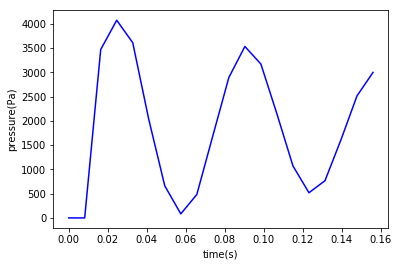

In [9]:
dt = 7.8e-5
time = np.linspace(dt,2000*dt,20)
pcenter = data4[:,1]
plt.plot(time,pcenter,'-b')
plt.xlabel('time(s)')
plt.ylabel('pressure(Pa)')
#print(t)

In [48]:
print(46215*1.5e-5)

0.693225
